**House Price Pridiction Using Linear Regression**\
(https://www.kaggle.com/competitions/5407/images/header)

**About the Project**
This project is the first task assigned to me as part of my Machine Learning internship at Prodigy Infotech. It serves as an introduction to the organization's workflow and allows me to begin applying my skills in a real-world environment while gaining hands-on experience.

**Project Goal**
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

**Dataset Description**
**File descriptions:**

**train.csv** - the training set

**test.csv** - the test set

**data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

**sample_submission**.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

**Data fields**:

**Here's a brief version of what you'll find in the data description file.**

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea:** Lot size in square feet

**Street:** Type of road access

**Alley:** Type of alley access

**LotShape:**General shape of property

**LandContour:**Flatness of the property

**Utilities:** Type of utilities available

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to main road or railroad

**Condition2:** Proximity to main road or railroad (if a second is present)

**BldgType:** Type of dwelling

**HouseStyle:** Style of dwelling

**OverallQual:**Overall material and finish quality

**OverallCond:**Overall condition rating

**earBuilt:** Original construction date

**YearRemodAdd:** Remodel date

**RoofStyle:** Type of roof

**RoofMatl:** Roof material

**Exterior1st:** Exterior covering on house

**Exterior2nd:** Exterior covering on house (if more than one material)

**MasVnrType:** Masonry veneer type

**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Exterior material quality

**ExterCond:** Present condition of the material on the exterior

**Foundation:** Type of foundation

**BsmtQual:** Height of the basement

**BsmtCond:** General condition of the basement

**BsmtExposure:** Walkout or garden level basement walls

**BsmtFinType1:** Quality of basement finished area

**BsmtFinSF1:** Type 1 finished square feet

**BsmtFinType2:** Quality of second finished area (if present)

**BsmtFinSF2:** Type 2 finished square feet

**BsmtUnfSF:** Unfinished square feet of basement area

**TotalBsmtSF:** Total square feet of basement area

**Heating:** Type of heating

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**Electrical:** Electrical system

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath:** Basement half bathrooms

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**Bedroom:** Number of bedrooms above basement level

**Kitchen:** Number of kitchens

**KitchenQual:** Kitchen quality

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Functional:** Home functionality rating

**Fireplaces:** Number of fireplaces

**FireplaceQu:** Fireplace quality

**GarageType:** Garage location

**GarageYrBlt:** Year garage was built

**GarageFinish:** Interior finish of the garage

**GarageCars:** Size of garage in car capacity

**GarageArea:** Size of garage in square feet

**GarageQual:** Garage quality

**GarageCond:** Garage condition

**PavedDrive:** Paved driveway

**WoodDeckSF:** Wood deck area in square feet

**OpenPorchSF:** Open porch area in square feet

**EnclosedPorch:** Enclosed porch area in square feet

**3SsnPorch:** Three season porch area in square feet

**ScreenPorch:** Screen porch area in square feet

**PoolArea:**Pool area in square feet

**PoolQC:** Pool quality

**Fence:**Fence quality

**MiscFeature:** Miscellaneous feature not covered in other categories

**MiscVal:** $Value of miscellaneous feature

**MoSold:** Month Sold

**YrSold:** Year Sold

**SaleType:** Type of sale

**SaleCondition:** Condition of sale

**Dataset Reference:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Import Dataset**

In [3]:
dataset= pd.read_csv('train.csv')

**Data Exploration**

In [4]:
#Convert dataset to dataframe

df= pd.DataFrame(dataset)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#Create a new dataframe with features that are relevant to the instruction/objective given

df= df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']]

df

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,1710,3,2,1,208500
1,1262,3,2,0,181500
2,1786,3,2,1,223500
3,1717,3,1,0,140000
4,2198,4,2,1,250000
...,...,...,...,...,...
1455,1647,3,2,1,175000
1456,2073,3,2,0,210000
1457,2340,4,2,0,266500
1458,1078,2,1,0,142125


In [7]:
df.describe()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,0.382877,180921.195890
std,525.480383,0.815778,0.550916,0.502885,79442.502883
min,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,0.000000,129975.000000
50%,1464.000000,3.000000,2.000000,0.000000,163000.000000
75%,1776.750000,3.000000,2.000000,1.000000,214000.000000
max,5642.000000,8.000000,3.000000,2.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [9]:
df.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [10]:
df.count().sum()

7300

In [11]:
df.shape

(1460, 5)

**Data Preprocessing**

In [12]:
#Define the pridictors and target variables

X= df.drop('SalePrice', axis=1)
y= df['SalePrice']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1460, 4)
y shape: (1460,)


In [13]:
#Scale the pridictor features
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)
     

In [14]:
#Split the dataset to training and testset

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state= 42)

**Model Building**

In [15]:
#Train the model

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predict on the testset

y_pred= model.predict(X_test)

In [17]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 2810942965.22


**Result And Findings**
After implementing the linear regression model using the selected features (GrLivArea, BedroomAbvGr, FullBath, and HalfBath), the model was trained and evaluated using an 80-20 train-test split. The performance of the model was assessed using Mean Squared Error (MSE) as the evaluation metric.

**Mean Squared Error (MSE):** The model achieved an MSE of 2810942965.22, indicating the average squared difference between the predicted and actual sale prices. This value reflects how well the model fits the test data.

**Feature Importance:** Among the features used, GrLivArea (above ground living area in square feet) appeared to have the most significant impact on predicting house prices. This is consistent with domain knowledge, as larger homes generally tend to have higher values.

**Model Interpretation:**
Since linear regression provides a straightforward interpretation of coefficients, we observed that the coefficients for FullBath and BedroomAbvGr also positively influenced the predicted sale price, although not as strongly as GrLivArea. HalfBath had a smaller but still positive contribution.

**Model Limitations:**
The model is relatively simple and only considers four features. Many other features from the dataset (e.g., overall quality, neighborhood, garage area) were excluded because they were not part of the instruction given and could improve prediction accuracy.

Linear regression assumes a linear relationship between the input features and the target variable. In reality, the relationship between house features and price may be nonlinear and more complex.

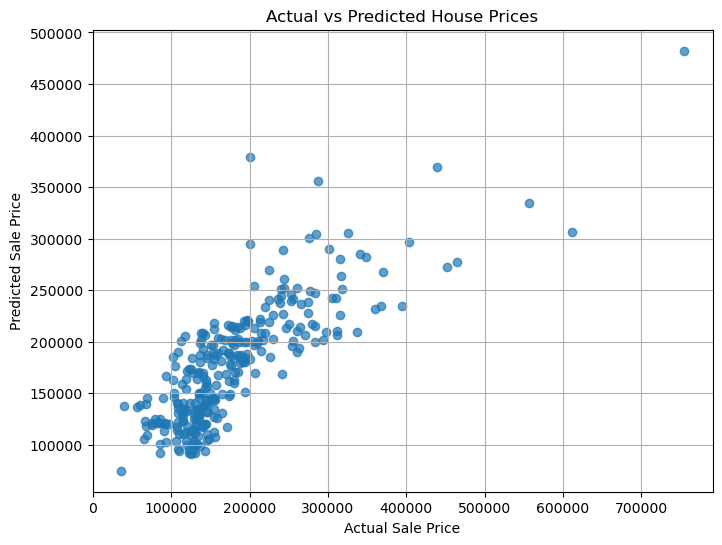

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

**Conclusion**
The project successfully demonstrates how linear regression can be applied to predict housing prices based on a limited set of features. While the model performs reasonably well for a baseline, there is significant room for improvement by incorporating more relevant features, handling non-linearity, and experimenting with more advanced regression techniques like Ridge, Lasso, or tree-based models.

**Author's Details:**
**Author**: Devesh Mokhariya

**Email:** deveshmokhariya@gmail.com

**Linkedin:** https://www.linkedin.com/in/devesh-mokhariya-91bbb6281 